In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2]]) 
def names(number):
    if(number == 0):
        return 'Capacitor'
    elif(number == 1):
        return 'Diode'
    if(number == 3):
        return 'Resistor'

C:\Users\Vee\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
data = []
paths = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\Data\Capacitor"):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\Data\Diode"):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\Data\Resistor"):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((32,32))
    data.append(np.array(x))

In [4]:
data = np.array(data)
data.shape

(700, 32, 32, 4)

In [5]:
ans = []
for i in range(700):
    if(i < 228):
        ans.append(enc.transform([[0]]).toarray().reshape(3))
    elif(i < 456):
        ans.append(enc.transform([[1]]).toarray().reshape(3))
    else:
        ans.append(enc.transform([[2]]).toarray().reshape(3))

In [6]:
ans = np.array(ans)
ans.shape

(700, 3)

In [7]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=False, random_state=42)

In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(2, 2), input_shape=(32, 32, 4)))
model.add(Conv2D(128, (2, 2), activation='sigmoid'))
model.add(Conv2D(128, (2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 128)       2176      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 128)       65664     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 128)       65664     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [15]:
history = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=1,validation_data=(x_test, y_test))

Train on 560 samples, validate on 140 samples
Epoch 1/20
560/560 [==============================] - 0s 750us/step - loss: 0.2275 - val_loss: 0.4005
Epoch 2/20
560/560 [==============================] - 0s 258us/step - loss: 0.2180 - val_loss: 0.3618
Epoch 3/20
560/560 [==============================] - 0s 232us/step - loss: 0.2176 - val_loss: 0.3370
Epoch 4/20
560/560 [==============================] - 0s 274us/step - loss: 0.2165 - val_loss: 0.3293
Epoch 5/20
560/560 [==============================] - 0s 239us/step - loss: 0.2230 - val_loss: 0.3282
Epoch 6/20
560/560 [==============================] - 0s 240us/step - loss: 0.2176 - val_loss: 0.3319
Epoch 7/20
560/560 [==============================] - 0s 274us/step - loss: 0.2241 - val_loss: 0.3376
Epoch 8/20
560/560 [==============================] - 0s 278us/step - loss: 0.2184 - val_loss: 0.3400
Epoch 9/20
560/560 [==============================] - 0s 267us/step - loss: 0.2196 - val_loss: 0.3423
Epoch 10/20
560/560 [===============

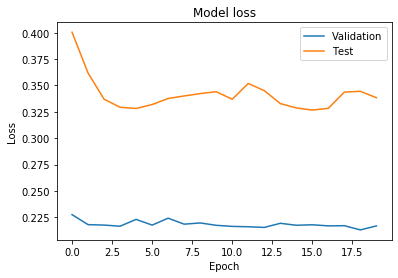

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Test'], loc='upper right')
plt.show()

In [22]:
img = Image.open(r'C:\Users\Vee\Desktop\Data\Diode\15389.png')
x = np.array(img.resize((32,32)))
x = x.reshape(1,32,32,4)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]

Diode


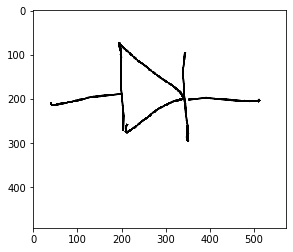

In [23]:
imshow(img)
print(names(classification))